In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [128]:
from sklearn import preprocessing

In [129]:
df = pd.read_csv('https://raw.githubusercontent.com/Shreyas3108/house-price-prediction/master/kc_house_data.csv')

In [130]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [131]:
df1=df.iloc[:,2:21]

In [132]:
df1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


{'boxes': [<matplotlib.lines.Line2D at 0x17559c76cf8>],
 'caps': [<matplotlib.lines.Line2D at 0x17559cc89b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x17559ba6198>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x17559babe80>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1755c074eb8>,
  <matplotlib.lines.Line2D at 0x17559cc15c0>]}

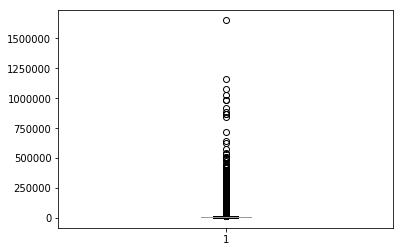

In [133]:
plt.boxplot(df1['sqft_lot'])

### normalisation

In [134]:
df2=(df1-df1.min())/(df1.max()-df1.min())

In [135]:
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.019266,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742
1,0.060721,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,0.5,0.500000,0.206140,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027
2,0.013770,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513
3,0.069377,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,1.0,0.500000,0.083333,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,0.004996
4,0.057049,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,0.5,0.583333,0.152412,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094,0.007871


### Heatmap

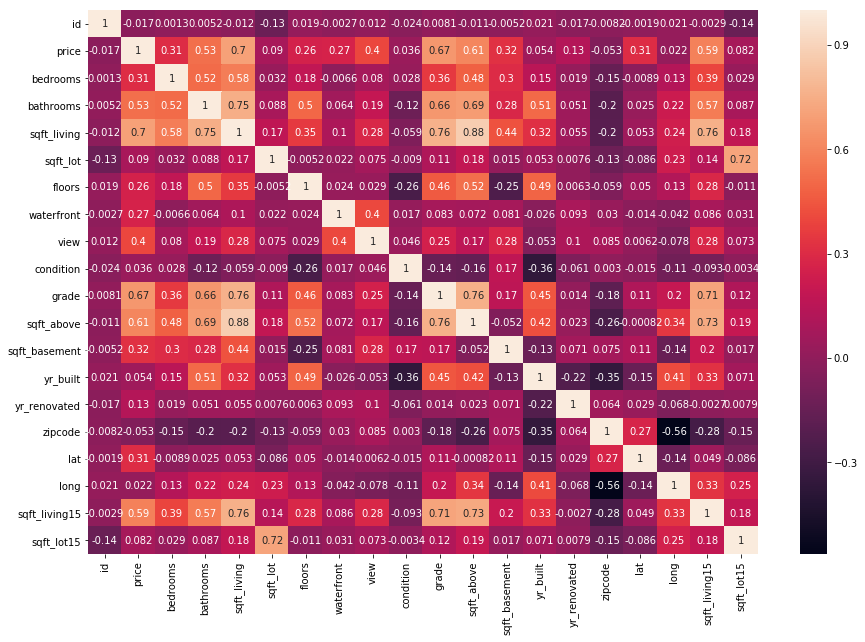

In [136]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

### Price max depends on Sqft_living

In [137]:
df3=df2['sqft_living']

In [138]:
df3.head()

0    0.067170
1    0.172075
2    0.036226
3    0.126038
4    0.104906
Name: sqft_living, dtype: float64

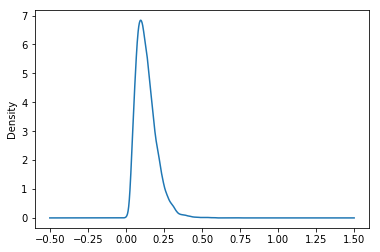

In [139]:
df3.plot(kind='kde')

In [140]:
df3.mean(),df3.std()

(0.1350867725486669, 0.06931629411674058)

In [141]:
df4=np.power(df3,1/2)

In [142]:
df4.mean(),df4.std()

(0.35635125150470054, 0.09000518272470114)

In [143]:
df5=np.power(df3,1/3)

In [144]:
df5.mean(),df5.std()

(0.4990794811873782, 0.08432832764102229)

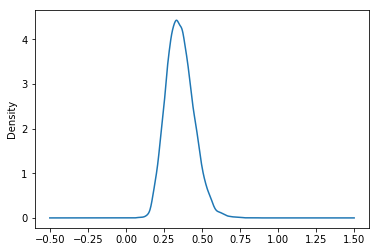

In [145]:
df4.plot(kind='kde')

### scaling

In [146]:
df6=preprocessing.scale(df4)

In [147]:
df6

array([-1.079739  ,  0.64962823, -1.84459058, ..., -1.35139141,
       -0.46574561, -1.35139141])

In [148]:
df6=pd.DataFrame(df6)

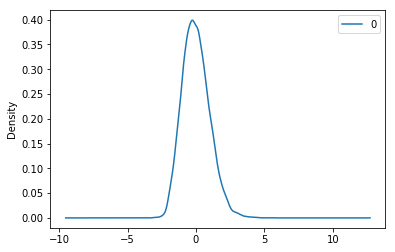

In [149]:
df6.plot(kind='kde')

###  linear regression

In [150]:
from sklearn.linear_model import LinearRegression

In [151]:
target= df.iloc[:,2:3]

In [153]:
target.shape

(21613, 1)

In [154]:
df6.shape

(21613, 1)

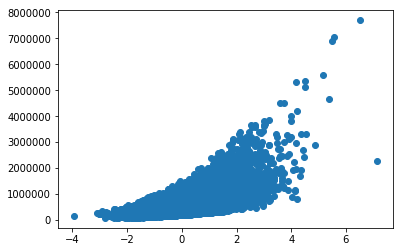

In [155]:
plt.scatter(x = df6,y = df['price'])

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
X_train,X_test,Y_train,Y_test = train_test_split(df6,target,test_size=0.2)

In [158]:
reg=LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [159]:
reg.coef_

array([[239395.06829666]])

In [160]:
reg.intercept_

array([540935.24126427])

In [161]:
df6_pred=reg.predict(X_test)

In [162]:
df6_pred

array([[393554.52644758],
       [454596.8771169 ],
       [843880.78649476],
       ...,
       [626484.36021078],
       [879654.84539204],
       [528868.6852323 ]])

In [165]:
a=pd.DataFrame({"actual":[Y_test],"prediction":[df6_pred]}).index=[0]

ValueError: If using all scalar values, you must pass an index